<a href="https://colab.research.google.com/github/noahgift/regression-concepts/blob/master/ml_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Regression

## Ingest

Source:  http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights

In [0]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/noahgift/functional_intro_to_python/master/data/mlb_weight_ht.csv")
df.head()


,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


Find N/A

In [0]:
df.shape

(1034, 6)

In [0]:
df.isnull().values.any()

True

In [0]:
df = df.dropna()
df.isnull().values.any()

False

In [0]:
df.shape

(1033, 6)

### Clean

In [0]:
df.rename(index=str, 
             columns={"Height(inches)": "Height", "Weight(pounds)": "Weight"},
             inplace=True)
df.head()


,Name,Team,Position,Height,Weight,Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


## EDA

In [0]:
df.describe()

,Height,Weight,Age
count,1033.000000,1033.000000,1033.000000
mean,73.698935,201.689255,28.737648
std,2.306330,20.991491,4.322298
min,67.000000,150.000000,20.900000
25%,72.000000,187.000000,25.440000
50%,74.000000,200.000000,27.930000
75%,75.000000,215.000000,31.240000
max,83.000000,290.000000,48.520000


## Model

In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split


### Create Features


In [0]:
var = df['Weight'].values
var.shape

(1033,)

In [0]:
y = df['Weight'].values #Target
y = y.reshape(-1, 1)
X = df['Height'].values #Feature(s)
X = X.reshape(-1,1)

In [0]:
#X = df[['Height', 'Age']].values

In [0]:
y.shape

(1033, 1)

### Split data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(826, 1) (826, 1)
(207, 1) (207, 1)


### Fit the model

In [0]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [0]:
lm.predict?

Returns Numpy Array

In [0]:
type(predictions)

numpy.ndarray

### Plot Predictions

Text(0, 0.5, 'Predicted Weight')

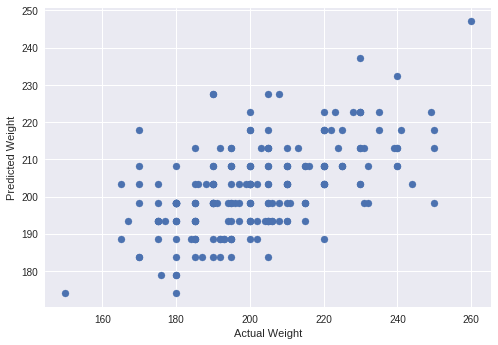

In [0]:
from matplotlib import pyplot as plt
plt.scatter(y_test, predictions)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")

### Print Accuracy of Linear Regression Model

In [0]:
model.score(X_test, y_test)

0.33282208398739177

### Visualize Regression Lasso (Regression) Model Accuracy with Yellowbrick

Note, uses Lasso Regression

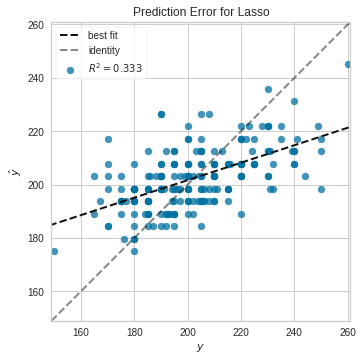

In [0]:
from yellowbrick.regressor import PredictionError
from sklearn.linear_model import Lasso

lasso = Lasso()
visualizer = PredictionError(lasso)
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
g = visualizer.poof()            # Draw/show/poof the data

### Use Cross-Validation

In [0]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [0]:
scores = cross_val_score(model, X, y, cv=6)
scores

array([0.29670427, 0.22459508, 0.29543549, 0.30012566, 0.19191046,
       0.34579806])

### Plot Cross-validation Predictions 

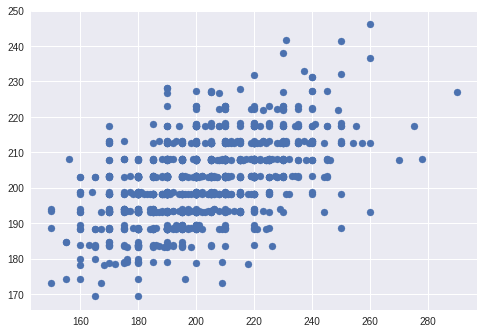

In [0]:
predictions = cross_val_predict(model, X, y, cv=6)
plt.scatter(y, predictions)

In [0]:
accuracy = metrics.r2_score(y, predictions)
accuracy

0.280770222008195

### Visualize cross-validated scores for Linear regression model

See this:  http://www.scikit-yb.org/en/latest/api/model_selection/cross_validation.html

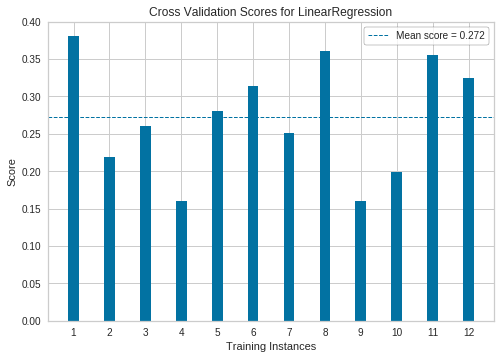

In [0]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from yellowbrick.model_selection import CVScores

# Create a new figure and axes
_, ax = plt.subplots()
cv = KFold(12)

oz = CVScores(
    linear_model.LinearRegression(), ax=ax, cv=cv, scoring='r2'
)

oz.fit(X, y)
oz.poof()

## Conclusion

* Cross-Validation improved Accuracy
* Adding more data or more features could improve the model
* Major League Baseball may be a strange set to predict Weight
* Bigger Data Set here:  http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html
